In [3]:
from pathlib import Path
import requests

DATA_PATH = Path('data')
PATH = DATA_PATH / 'MNIST'

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

if not(PATH/FILENAME).exists() :
    content = requests.get(URL + FILENAME).content
    (PATH/FILENAME).open('wb').write(content)

In [4]:
import pickle
import gzip

with gzip.open((PATH/FILENAME).as_posix(), 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

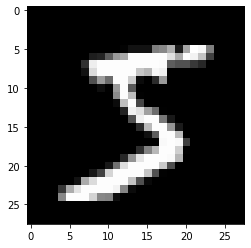

(50000, 784)


In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x_train[0].reshape(28,28), cmap ='gray')
plt.show()
print(x_train.shape)

In [8]:
import torch

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid) )

n, c = x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


## Neural Network from scratch

In [25]:
import math

weights = torch.randn(784, 10) / math.sqrt(784) #xavier initialization
weights.requires_grad_()
bias = torch.zeros(10, requires_grad = True)

In [26]:
def log_softmax(x) :
    return  x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb) :
    return log_softmax(torch.matmul(xb, weigths) + bias)

In [27]:
bs = 64

xb = x_train[0:bs]
preds = model(xb)
print(preds[0], preds.shape)

tensor([-2.4593, -1.8636, -2.4373, -2.0243, -2.7319, -2.3124, -2.3067, -2.4577,
        -2.4108, -2.2942], grad_fn=<SelectBackward>) torch.Size([64, 10])


In [28]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [29]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.2802, grad_fn=<NegBackward>)


In [30]:
def accuracy(out, yb) :
    preds = torch.argmax(out, dim =1)
    return (preds == yb).type(torch.float).mean()

In [31]:
print(accuracy(preds, yb))

tensor(0.1719)


In [32]:
from IPython.core.debugger import set_trace

lr = 0.5  # learning rate
epochs = 2  # how many epochs to train for

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        #         set_trace()
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [35]:
lr

0.5